In [2]:
using Distributions
using StatsPlots
using StaticArrays

In [33]:
function rand_sim(m, n, q, ω)
    u = @. ω * q / (1 - q)
    p = @. u / (1 + u)
    k = @. rand(Binomial(m, p))
    l = @. rand(Binomial(n, q))
    k, m .- k, l, n .- l
end

function or_sim(a, b, c, d)
    N = @. a + b + c + d
    sum(@. a * d / N) / sum(@. b * c / N)
end

function sim(;
        m = (10, 20, 30),
        n = (20, 20, 20),
        q = (0.4, 0.5, 0.6),
        ω = Tuple(fill(exp(1), length(n))),
        L = 10^6
    )
    logOR = Vector{Float64}(undef, L)
    abcd = similar([rand_sim(m, n, q, ω)], L)
    Threads.@threads for i in 1:L
        a, b, c, d = rand_sim(m, n, q, ω)
        abcd[i] = (a, b, c, d)
        logOR[i] = log(or_sim(a, b, c, d))
    end
    (; logOR, abcd, m, n, q, ω)
end

sim (generic function with 1 method)

  0.199682 seconds (344.03 k allocations: 117.139 MiB, 9.14% gc time, 49.35% compilation time)
μ = mean(logOR) = 1.0214422809478225
σ = std(logOR) = 0.41798894630578876


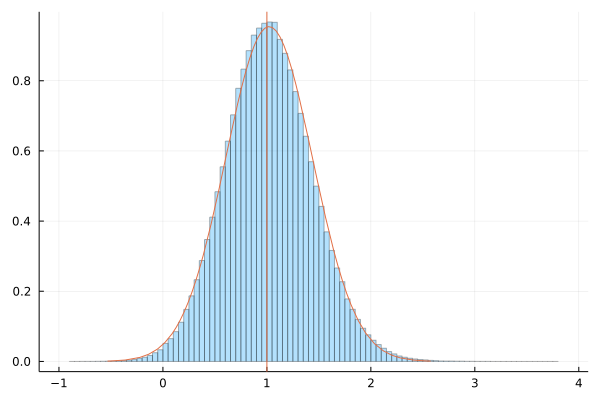

In [34]:
@time (; logOR, abcd, m, n, q, ω) = sim()
@show μ = mean(logOR)
@show σ = std(logOR)
histogram(logOR; norm=true, alpha=0.3, bin=100, label="")
plot!(Normal(μ, σ); label="")
vline!([1]; c=2, label="")

  0.118352 seconds (72 allocations: 99.190 MiB, 30.66% gc time)
μ = mean(logOR) = 0.3762809273239473
σ = std(logOR) = 0.38867619509834206


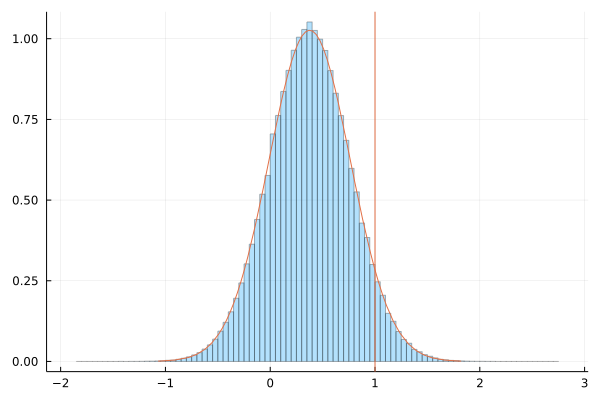

In [38]:
@time (; logOR, abcd, m, n, q, ω) = sim(; ω = (0.5, 2.0, 2.0))
@show μ = mean(logOR)
@show σ = std(logOR)
histogram(logOR; norm=true, alpha=0.3, bin=100, label="")
plot!(Normal(μ, σ); label="")
vline!([1]; c=2, label="")